## 2. Import Libraries

In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#models
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

#metrics
from sklearn.metrics import classification_report, confusion_matrix

## 3. Data Loading

In [30]:
random_state = 34

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
data = pd.read_csv('creditcard.csv')

In [33]:
df = data.copy()

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [38]:
df.duplicated().sum()

1081

In [91]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [93]:
outlier_fraction = len(df[df['Class'] == 1]) / len(df)
outlier_fraction

0.001727485630620034

## 4. Exploratory Data Analysis (EDA)

### Histogram

## 5. Data Preprocessing

Pisahkan data untuk inference.

In [39]:
df_inf = df.dropna().sample(3, random_state=random_state)
df.drop(index=df_inf.index)
df_inf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78921,57772.0,-0.316161,1.336281,-1.804674,-0.256085,2.519849,3.046683,0.058375,1.171650,-0.631455,0.353188,-0.438184,-0.058934,-0.046908,0.887561,0.831951,-0.129240,-0.484251,0.348308,0.720415,0.182842,0.091871,0.269838,0.038886,1.001266,-0.479042,-0.392731,0.422930,0.220765,1.40,0
126487,78017.0,1.272287,0.319855,-0.063514,0.441530,0.269658,-0.110140,0.025806,-0.040381,0.009267,-0.340597,-0.509302,0.313609,0.862086,-0.410776,1.351486,0.407174,-0.061303,-0.536485,-0.243729,-0.052299,-0.309233,-0.828628,0.048770,-0.793196,0.272502,0.174470,-0.004401,0.020021,1.98,0
281642,170327.0,1.459031,-1.684189,-0.233954,0.146372,-1.628440,-0.450132,-0.579494,-0.073611,-0.444851,0.850034,1.321488,1.400054,1.000412,-0.084893,-0.381654,-1.101446,-0.317305,1.181405,-1.016162,-0.000796,-0.292535,-0.894797,0.295247,0.458480,-0.883487,-0.101672,-0.034802,0.012571,292.00,0


Deklarasi data untuk training dengan mengeluarkan primary key dan feature kategorik dari train set.

In [40]:
df_num = df.drop(columns='Class')

### 5.1. Outliers Handling

Buat fungsi untuk deteksi outlier.

In [41]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

In [42]:
def outliersum(dataframe):
    #variable untuk summary
    distribution = []
    skewness = []
    upper_limit = []
    lower_limit = []
    outliers_percent = []
    max = []
    min = []

    #loop untuk summary outlier
    for column in dataframe.columns:

        #cek skewness
        col_skewness = dataframe[column].skew()

        #conditional berdasarkan skewnewss
        if (col_skewness >= -0.5) & (col_skewness <= 0.5):
            col_distribution = 'Normal'
            col_upper_limit, col_lower_limit = find_normal_boundaries(dataframe,column)      
        else:
            col_distribution = 'Skewed'
            col_upper_limit, col_lower_limit = find_skewed_boundaries(dataframe,column)
        
        #cek min,max, dan jumlah outlier
        col_max = dataframe[column].max()
        col_min = dataframe[column].min()
        col_outliers_percent = (len(dataframe[dataframe[column] > col_upper_limit]) +  \
                                len(dataframe[dataframe[column] < col_lower_limit])) / \
                                len(dataframe) * 100
        
        #update summary per loop
        distribution.append(col_distribution)
        skewness.append(col_skewness)
        upper_limit.append(col_upper_limit)
        max.append(col_max)
        min.append(col_min)
        lower_limit.append(col_lower_limit)
        outliers_percent.append(col_outliers_percent)

    #df summary
    outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'min':min , 'lower_limit':lower_limit, 'upper_limit':upper_limit, 'max':max, 'outliers_percent':outliers_percent}
    outliers_summary = pd.DataFrame(outliers_summary,index=dataframe.columns)
    outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
    outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
    return outliers_summary

### 5.2. Scaling

In [51]:
df_scaled = StandardScaler().fit_transform(df_num)

In [53]:
df_scaled = pd.DataFrame(df_scaled, columns=df_num.columns)

### 5.4. Variance Inflation Factor

Cek nilai VIF pada dataset untuk masing-masing kolom.

In [54]:
#pembuatan dataframe VIF
df_vif = pd.DataFrame()
df_vif["Feature"] = df_scaled.columns
  
#hitung dan urutkan VIF dari kecil ke besar
df_vif["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns))]
df_vif.sort_values('VIF',ascending=True,inplace=True)
df_vif.reset_index(drop=True,inplace=True)
df_vif

,Feature,VIF
0,V16,1.000448
1,V24,1.000806
2,V28,1.001433
3,V26,1.003359
4,V13,1.008474
5,V27,1.010105
6,V17,1.010701
7,V9,1.023894
8,V12,1.030070
9,V18,1.031048


### 5.5. Explained Variance Ratio

In [55]:
df_evr = PCA().fit(df_scaled)

In [56]:
col_length = len(df_scaled.columns) + 1

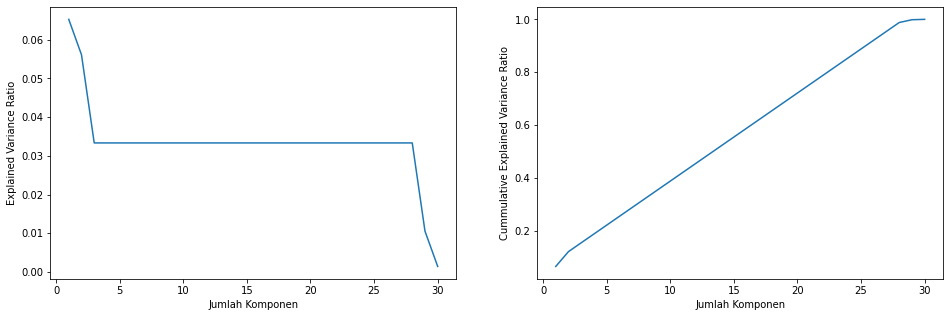

In [57]:
fig,ax=plt.subplots(ncols=2, figsize=(16,5))
ax[0].plot(range(1,col_length), df_evr.explained_variance_ratio_)
ax[0].set_xlabel('Jumlah Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,col_length), np.cumsum(df_evr.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Cummulative Explained Variance Ratio')
plt.show()

### 5.6. Component Reduction

In [63]:
pca = PCA(n_components=29)

In [64]:
df_pca = pca.fit_transform(df_scaled)

Cek ukuran data setelah PCA.

In [65]:
df_pca.shape

(284807, 29)

### 5.7. Cluster Size Initial Check

Sebelum melakukan modeling, cek terlebih dahulu visualisasi sebaran dataset.

In [66]:
#reduksi ke 2 dimensi
pca_vis2d = PCA(n_components=2, random_state=random_state)
df_pca_vis2d = pca_vis2d.fit_transform(df_pca)

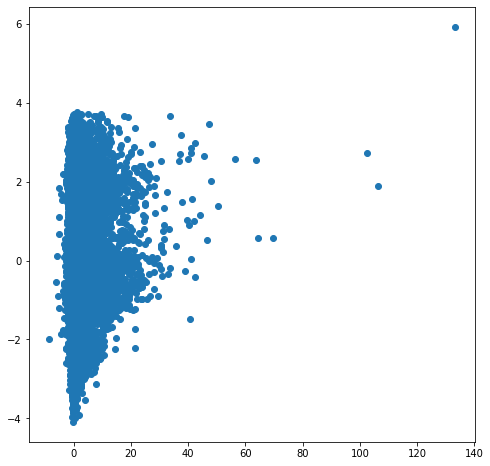

In [67]:
#plot 2 dimensi
plt.figure(figsize=(8,8))
plt.scatter(x=df_pca_vis2d[:,0], y=df_pca_vis2d[:,1])
plt.show()

## 6. Model Definition

In [74]:
IF = IsolationForest(n_estimators=100, max_samples='auto', contamination=outlier_fraction, n_jobs=-1, random_state=random_state, verbose=1)

## 7. Model Training

In [94]:
IF.fit(df_pca)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    1.4s remaining:    7.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.5s finished


IsolationForest(contamination=0.00173, n_jobs=-1, random_state=34, verbose=1)

## 8. Model Evaluation

In [95]:
y_pred = IF.predict(df_pca)
y_pred = pd.DataFrame(y_pred, columns=['Prediction'])

In [96]:
y_pred.value_counts()

Prediction
 1            284314
-1               493
dtype: int64

In [98]:
y_pred = y_pred.Prediction.map({-1:1, 1:0})

In [99]:
y_pred.value_counts()

0    284314
1       493
Name: Prediction, dtype: int64

In [100]:
print(classification_report(df['Class'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.29      0.29       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



In [102]:
print(confusion_matrix(df['Class'], y_pred))

[[283965    350]
 [   349    143]]
